In [1]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
linux_pro1 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/Linux_process_1.csv')
linux_pro2 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/Linux_process_2.csv')
linux_pro = pd.concat([linux_pro1, linux_pro2])

In [4]:
linux_pro.drop('ts', axis = 1, inplace=True)
linux_pro.drop('type', axis = 1, inplace= True)

linux_pro.head()

,PID,TRUN,TSLPI,TSLPU,POLI,NICE,PRI,RTPR,CPUNR,Status,EXC,State,CPU,CMD,label
0,3257,0,23,0,norm,0,120,0,2,N,0,S,0.13,Web-Content,0
1,1442,0,1,0,norm,0,120,0,0,N,0,S,0.09,Xorg,0
2,3197,0,63,0,norm,0,120,0,3,N,0,S,0.06,firefox,0
3,2774,0,8,0,norm,0,120,0,0,N,0,S,0.06,compiz,0
4,2797,0,5,0,norm,0,120,0,0,N,0,S,0.04,nautilus,0


In [5]:
linux_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927968 entries, 0 to 927967
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PID     int64  
 1   TRUN    int64  
 2   TSLPI   int64  
 3   TSLPU   int64  
 4   POLI    object 
 5   NICE    int64  
 6   PRI     int64  
 7   RTPR    int64  
 8   CPUNR   int64  
 9   Status  object 
 10  EXC     int64  
 11  State   object 
 12  CPU     float64
 13  CMD     object 
 14  label   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 235.3+ MB


In [6]:
linux_pro['State'].replace('S',  '-2', inplace=True)
linux_pro['State'].replace('I',  '2', inplace=True)
linux_pro['State'].replace('R',  '1', inplace=True)
linux_pro['State'].replace('E',  '0', inplace=True)
linux_pro['State'].replace('Z',  '4', inplace=True)
linux_pro['State'].replace('D',  '-1', inplace=True)
linux_pro['State'].replace('T',  '3', inplace=True)
linux_pro['State']=linux_pro['State'].astype(int)

linux_pro['Status'].replace('-',  '-1', inplace=True)
linux_pro['Status'].replace('NE',  '1', inplace=True)
linux_pro['Status'].replace('N',  '2', inplace=True)
linux_pro['Status'].replace('NS',  '3', inplace=True)
linux_pro['Status'].replace('C',  '4', inplace=True)
linux_pro['Status'].replace('NC',  '5', inplace=True)
linux_pro['Status']=linux_pro['Status'].astype(int)

linux_pro['POLI'].replace('-',  '-1', inplace=True)
linux_pro['POLI'].replace('norm',  '1', inplace=True)
linux_pro['POLI']=linux_pro['POLI'].astype(int)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_pro['CMD'] = le.fit_transform(linux_pro['CMD'])

col:  PID


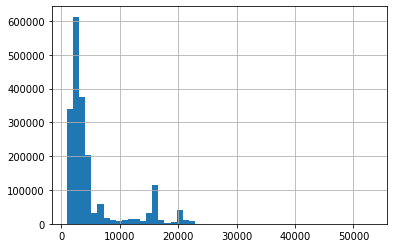

col:  TRUN


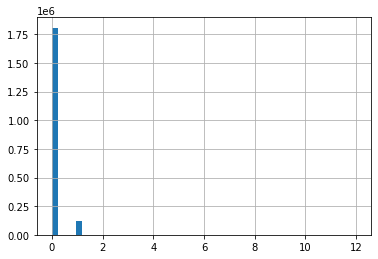

col:  TSLPI


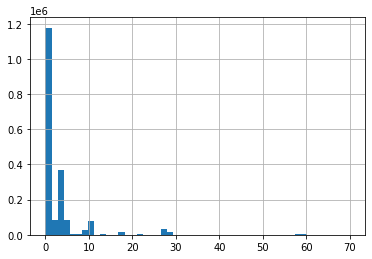

col:  TSLPU


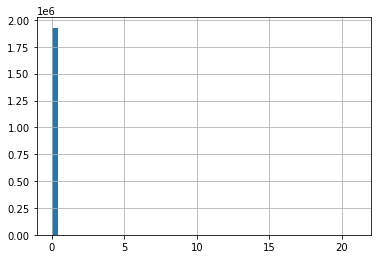

col:  POLI


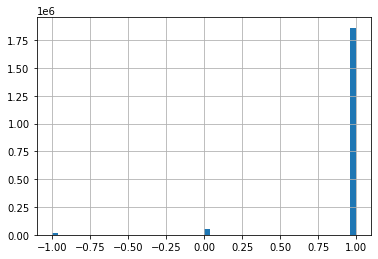

col:  NICE


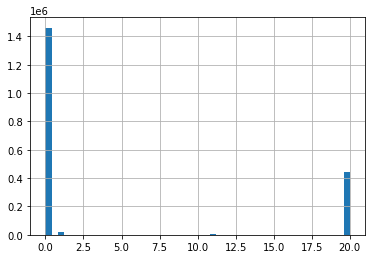

col:  PRI


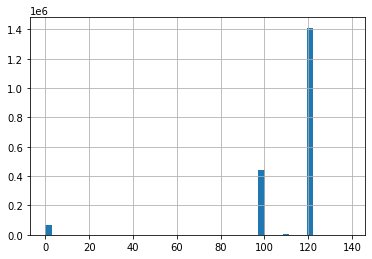

col:  RTPR


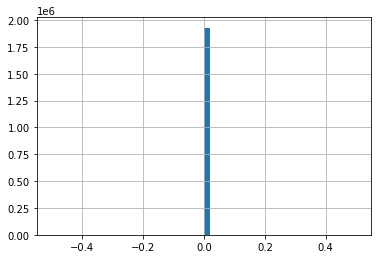

col:  CPUNR


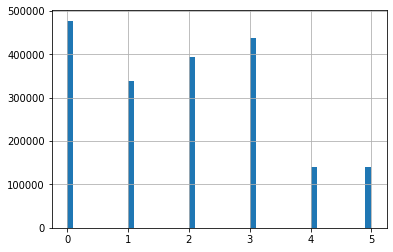

col:  Status


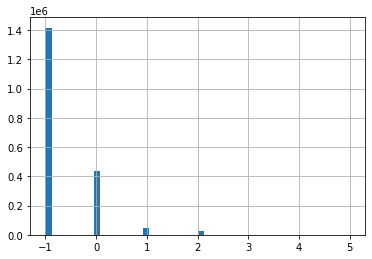

col:  EXC


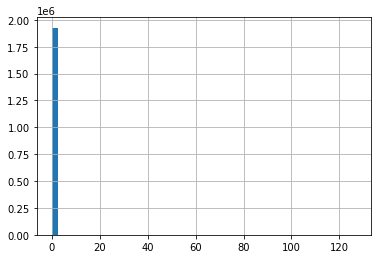

col:  State


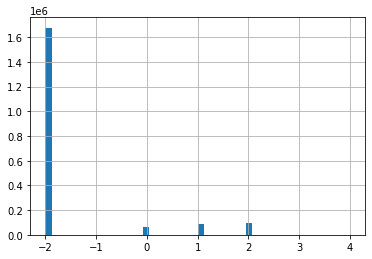

col:  CPU


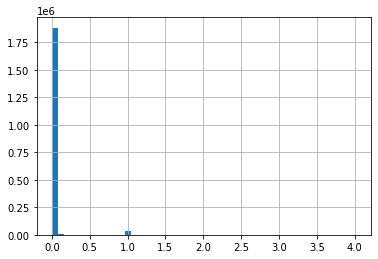

col:  CMD


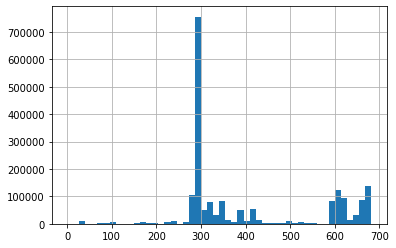

col:  label


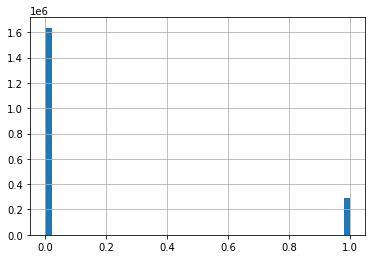

In [8]:
import matplotlib.pyplot as plt
columns = linux_pro.columns

for col in columns:
    print("col: ", col)
    linux_pro[col].hist(bins = 50)
    plt.show()

In [9]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [10]:
x = linux_pro.drop('label', axis = 1)
y = linux_pro['label']

# Without Oversampling

In [11]:
# --------------------------Random Forest -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(x_train, y_train) #Training the model
y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)# printing predictions

#Accuracy Score

from sklearn.metrics import accuracy_score
rfcAccuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of RandomForest : ",rfcAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
rfcf1_scr = f1_score(y_test, y_pred_rfc)
print("f1_score of RandomForest : ",rfcf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score, confusion_matrix
auc = roc_auc_score (y_test, y_pred_rfc)
print('AUC: %.2f' % auc)

[0 0 0 ... 1 0 1]
Accuracy of RandomForest :  87.85540008962805 %
f1_score of RandomForest :  50.110796713599015 %
AUC: 0.68


In [12]:
confusion_matrix(y_test,y_pred_rfc)

array([[197029,   7546],
       [ 21722,  14699]])

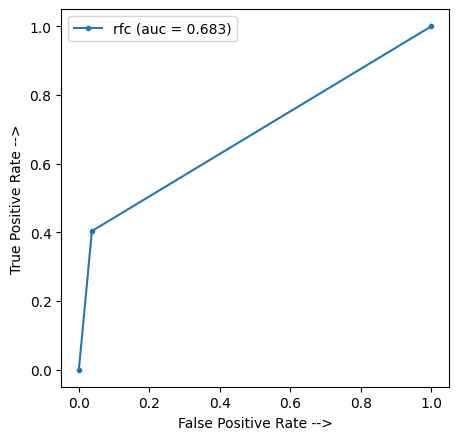

In [13]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='rfc (auc = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [15]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.9 MB/s eta 0:00:00


In [16]:
import xgboost
import shap

# train an XGBoost model
x, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(x, y)

[17:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(x)


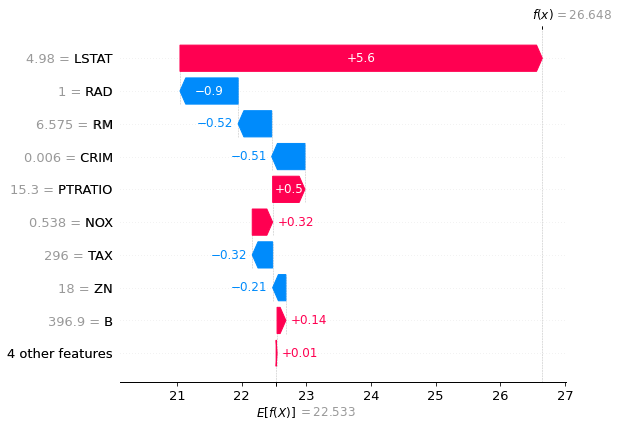

In [18]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [19]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [20]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values)

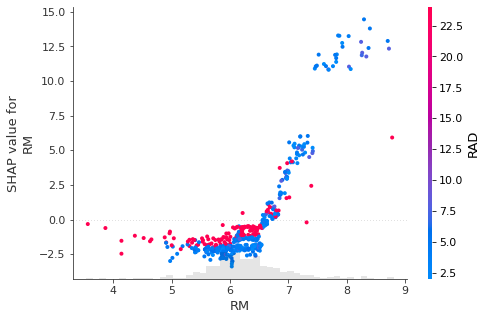

In [21]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

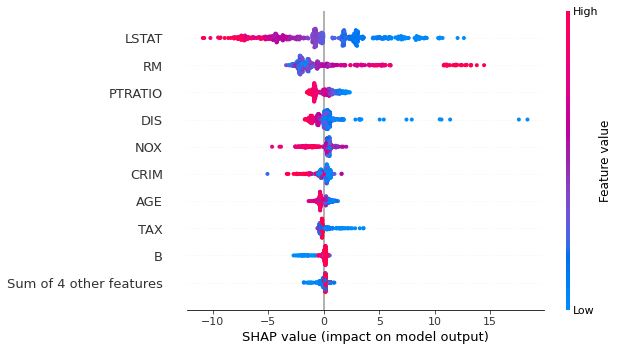

In [22]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

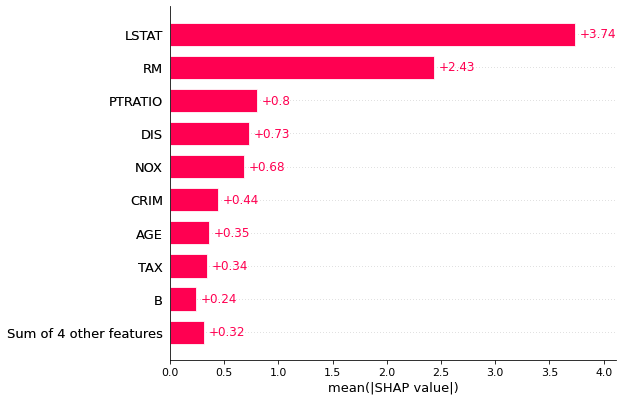

In [23]:
shap.plots.bar(shap_values)

# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1432029, 1: 254943}
After oversampling {0: 1432029, 1: 1432029}


In [ ]:
# --------------------------Random Forest -----------------------------------
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(x_train, y_train) #Training the model
y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
rfcAccuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of RandomForest : ",rfcAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
rfcf1_scr = f1_score(y_test, y_pred_rfc)
print("f1_score of RandomForest : ",rfcf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_rfc)
print('AUC: %.2f' % auc)

[0 0 0 ... 1 1 1]
Accuracy of RandomForest :  81.50734482845307 %
f1_score of RandomForest :  82.63288642188405 %
AUC: 0.82


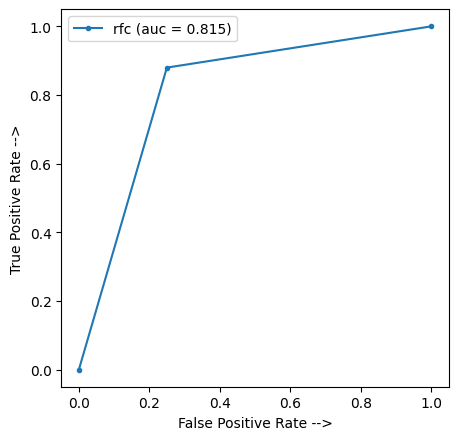

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='rfc (auc = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Undersampling

In [ ]:
x = linux_pro.drop(['label'],axis=1)
y = linux_pro['label']
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_unsampled, y_unsampled = rus.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_unsampled))


Before undersampling Counter({0: 1432029, 1: 254943})
After undersampling Counter({0: 254943, 1: 254943})


^for some reason the undersampling is not complete

In [ ]:
for train_index, test_index in skf.split(x_unsampled, y_unsampled):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(x_train, y_train) #Training the model
y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
rfcAccuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of RandomForest : ",rfcAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
rfcf1_scr = f1_score(y_test, y_pred_rfc)
print("f1_score of RandomForest : ",rfcf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_rfc)
print('AUC: %.2f' % auc)



In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='rfc (auc = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()